In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
data = pd.read_csv("Plots/performance_records.csv")
data = data[data['data_size'] == 100000]
data.head(10)

,h,k,p,sigma,data_size,distortion,time_find_min_moles,time_total
0,0.4,30,2,0.15,100000,0.089038,98,174
1,0.4,30,3,0.15,100000,0.085790,478,552
2,0.4,30,4,0.15,100000,0.095449,978,1061
3,0.4,30,5,0.15,100000,0.098805,1258,1361
4,0.4,30,6,0.15,100000,0.103487,2005,2099
5,0.4,30,7,0.15,100000,0.125590,4154,4258
6,0.4,5,4,0.15,100000,0.109383,2178,2278
7,0.4,10,4,0.15,100000,0.111346,1860,1977
8,0.4,20,4,0.15,100000,0.105117,1744,1852
9,0.4,30,4,0.15,100000,0.089137,748,843


In [62]:
# star with p vs distortion and p vs runtime


In [63]:
def prepare_values(data, col_name):
    print(f'\n#--- Preparing values for {col_name} ---#\n')
    df=None
    if col_name == 'p':
        df = data.loc[(data.h == 0.4) & (data.k == 30) & (data.sigma == 0.15) & (data.data_size == 100000)]
        print(df.head(10))
    if col_name == 'k':
        df = data.loc[(data.h == 0.4) & (data.p == 4) & (data.sigma == 0.15) & (data.data_size == 100000)]
        print(df.head(10))
    if col_name == 'sigma':
        df = data.loc[(data.h == 0.4) & (data.p == 4) & (data.k == 30) & (data.data_size == 100000)]
        print(df.head(10))

    range_keys = sorted(df[col_name].unique())
    distortion_dict = {}
    runtime_dict = {}
    for key in range_keys:
        # multiply by 100 to make it a percentage value
        distortion_dict[key] = round(df[df[col_name]==key]['distortion'].mean() * 100, 2)
        runtime_dict[key] = {'total': round(df[df[col_name] == key]['time_total'].mean()),
                        'min_moles':round(df[df[col_name] == key]['time_find_min_moles'].mean())}

    print(f'distortion: {distortion_dict}\n'
          f'runtime: {runtime_dict}')
    return distortion_dict, runtime_dict

def plot_distortion(x,y, x_label: str):

    # x = np.asarray(x)
    # y = np.asarray(y)

    y_ticks = [i for i in range(0,30,5)]
    print(y_ticks)

    fig, ax = plt.subplots(1)
    ax.plot(x,y, marker='v',linewidth=2, color='blue')
    ax.set_title(f'Distortion vs {x_label}')
    ax.set_xlabel(x_label)
    ax.set_ylabel('Distortion')
    ax.set_ylim([0,25])
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([f'{i}%' for i in y_ticks])
    ax.legend()

def plot_runtime():
    pass

In [64]:
p_distortion, p_runtime = prepare_values(data, 'p')
k_distortion, k_runtime = prepare_values(data,'k')
sigma_distortion, sigma_runtime = prepare_values(data, 'sigma')
print(p_distortion.keys())
print(k_distortion.keys())
print(sigma_distortion.keys())


#--- Preparing values for p ---#

      h   k  p  sigma  data_size  distortion  time_find_min_moles  time_total
0   0.4  30  2   0.15     100000    0.089038                   98         174
1   0.4  30  3   0.15     100000    0.085790                  478         552
2   0.4  30  4   0.15     100000    0.095449                  978        1061
3   0.4  30  5   0.15     100000    0.098805                 1258        1361
4   0.4  30  6   0.15     100000    0.103487                 2005        2099
5   0.4  30  7   0.15     100000    0.125590                 4154        4258
9   0.4  30  4   0.15     100000    0.089137                  748         843
14  0.4  30  4   0.15     100000    0.106258                 1239        1319
distortion: {2: 8.9, 3: 8.58, 4: 9.69, 5: 9.88, 6: 10.35, 7: 12.56}
runtime: {2: {'total': 174, 'min_moles': 98}, 3: {'total': 552, 'min_moles': 478}, 4: {'total': 1074, 'min_moles': 988}, 5: {'total': 1361, 'min_moles': 1258}, 6: {'total': 2099, 'min_moles': 200

[0, 5, 10, 15, 20, 25]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0, 5, 10, 15, 20, 25]
[0, 5, 10, 15, 20, 25]


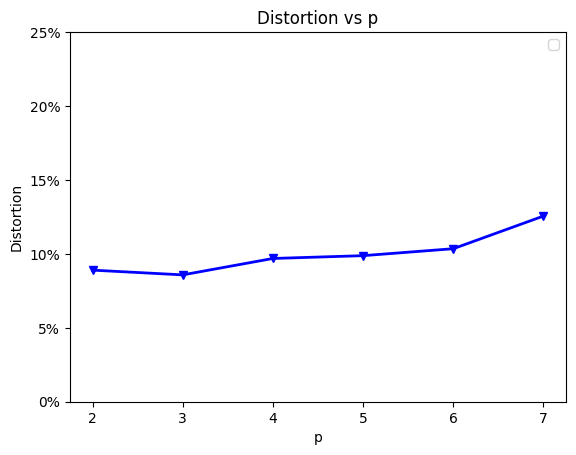

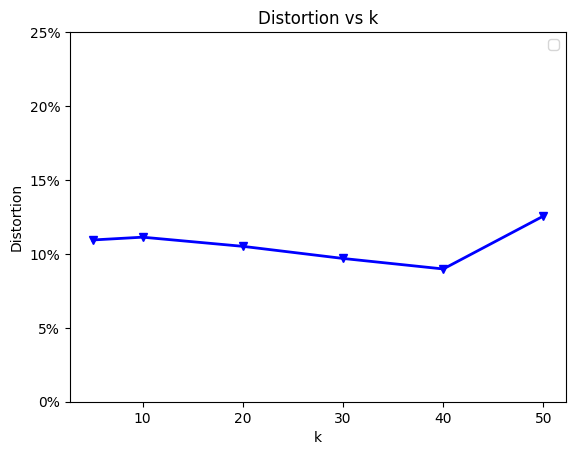

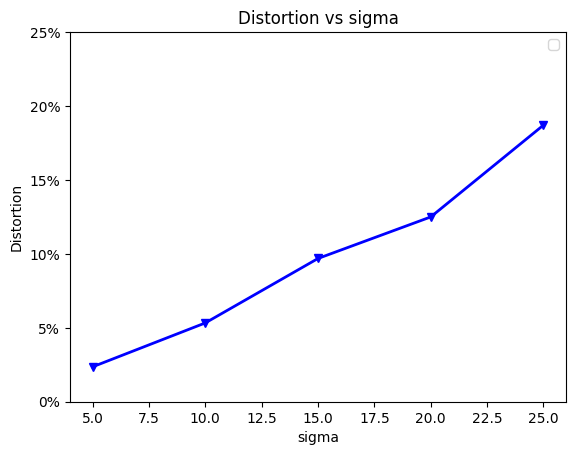

In [65]:
plot_distortion(p_distortion.keys(), p_distortion.values(), 'p')
plot_distortion(k_distortion.keys(), k_distortion.values(), 'k')
plot_distortion([i*100 for i in sigma_distortion.keys()], sigma_distortion.values(), 'sigma')



[174, 552, 1074, 1361, 2099, 4258]
[98, 478, 988, 1258, 2005, 4154]
[2, 3, 4, 5, 6, 7]
[0, 5, 10, 15, 20, 25]


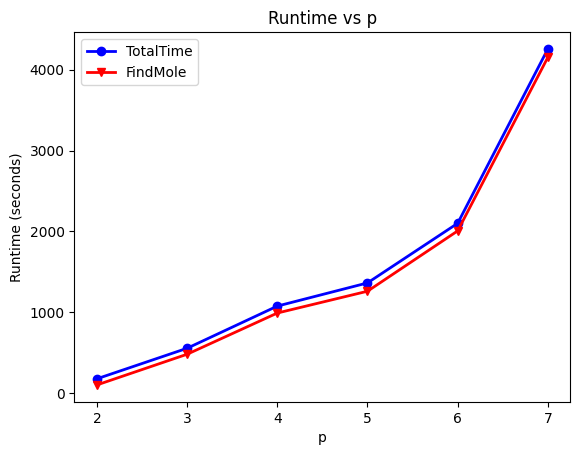

In [66]:
## Plots for p vs runtime
x = [i for i in p_runtime.keys()]
y_total = list(map(lambda a: p_runtime.get(a)['total'], p_runtime))
y_min_moles = list(map(lambda a: p_runtime.get(a)['min_moles'], p_runtime))
print(list(y_total))
print(list(y_min_moles))
print(x)

x_label = 'p'
y_ticks = [i for i in range(0,30,5)]
print(y_ticks)

fig, ax = plt.subplots(1)
ax.plot(x,y_total, label='TotalTime', marker='o', linewidth=2, color='blue')
ax.plot(x,y_min_moles, label='FindMole', marker='v', linewidth=2, color='red')
ax.set_title(f'Runtime vs {x_label}')
ax.set_xlabel(x_label)
ax.set_ylabel('Runtime (seconds)')
# plt.gca().patch.set_facecolor('white')
ax.legend()

[2278, 1977, 1852, 1074, 897, 2092]
[2178, 1860, 1744, 988, 802, 2009]
[5, 10, 20, 30, 40, 50]
[0, 5, 10, 15, 20, 25]


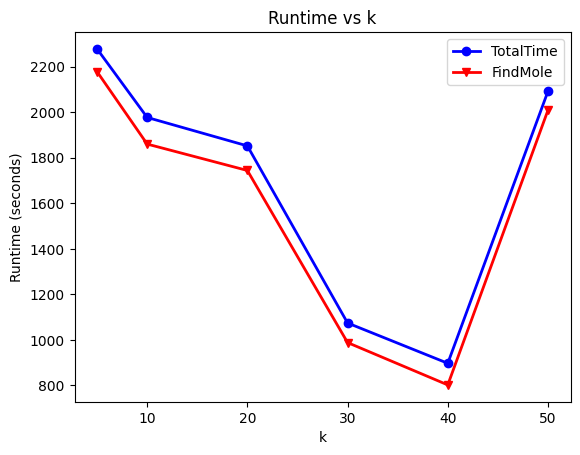

In [67]:
# plot for k vs runtime

x = [i for i in k_runtime.keys()]
y_total = list(map(lambda a: k_runtime.get(a)['total'], k_runtime))
y_min_moles = list(map(lambda a: k_runtime.get(a)['min_moles'], k_runtime))
print(list(y_total))
print(list(y_min_moles))
print(x)

x_label = 'k'
y_ticks = [i for i in range(0,30,5)]
print(y_ticks)

fig, ax = plt.subplots(1)
ax.plot(x,y_total, label='TotalTime', marker='o', linewidth=2, color='blue')
ax.plot(x,y_min_moles, label='FindMole', marker='v', linewidth=2, color='red')
ax.set_title(f'Runtime vs {x_label}')
ax.set_xlabel(x_label)
ax.set_ylabel('Runtime (seconds)')
ax.legend()

[41, 155, 1074, 4421, 11459]
[16, 109, 988, 4296, 11268]
[5.0, 10.0, 15.0, 20.0, 25.0]
[0, 5, 10, 15, 20, 25]


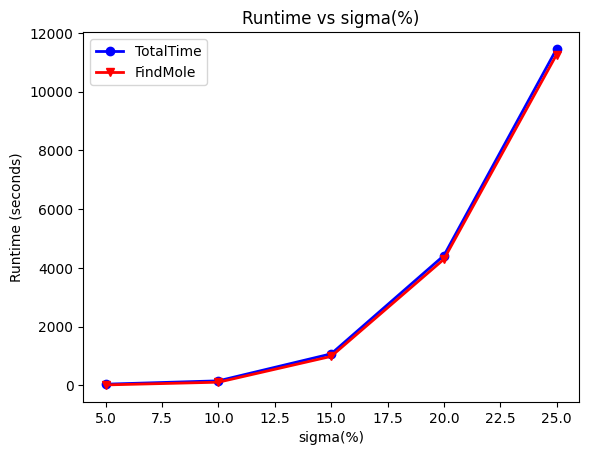

In [68]:
# plot for sigma vs runtime
x = [i*100 for i in sigma_runtime.keys()]
y_total = list(map(lambda a: sigma_runtime.get(a)['total'], sigma_runtime))
y_min_moles = list(map(lambda a: sigma_runtime.get(a)['min_moles'], sigma_runtime))
print(list(y_total))
print(list(y_min_moles))
print(x)

x_label = 'sigma(%)'
y_ticks = [i for i in range(0,30,5)]
print(y_ticks)

fig, ax = plt.subplots(1)
ax.plot(x,y_total, label='TotalTime', marker='o', linewidth=2, color='blue')
ax.plot(x,y_min_moles, label='FindMole', marker='v', linewidth=2, color='red')
ax.set_title(f'Runtime vs {x_label}')
ax.set_xlabel(x_label)
ax.set_ylabel('Runtime (seconds)')
ax.legend()